In [267]:
#####################################################################################################
######################### YELP REVIEWS DATA SET  ####################################################
#####################################################################################################


In [268]:
#################################################################
############ Part I - Importing
#################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [269]:
df = pd.read_csv('yelp.csv')

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [271]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [272]:
#####################################################################
########################### Part II - Duplicates
#####################################################################


In [273]:
df[df.duplicated()]                            #### no duplicates found

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny


In [274]:
####################################################################
############## Part III - Missing Values
####################################################################


In [275]:
from matplotlib.colors import LinearSegmentedColormap

Amelia = LinearSegmentedColormap.from_list('black_yellow', ['black', 'yellow'])


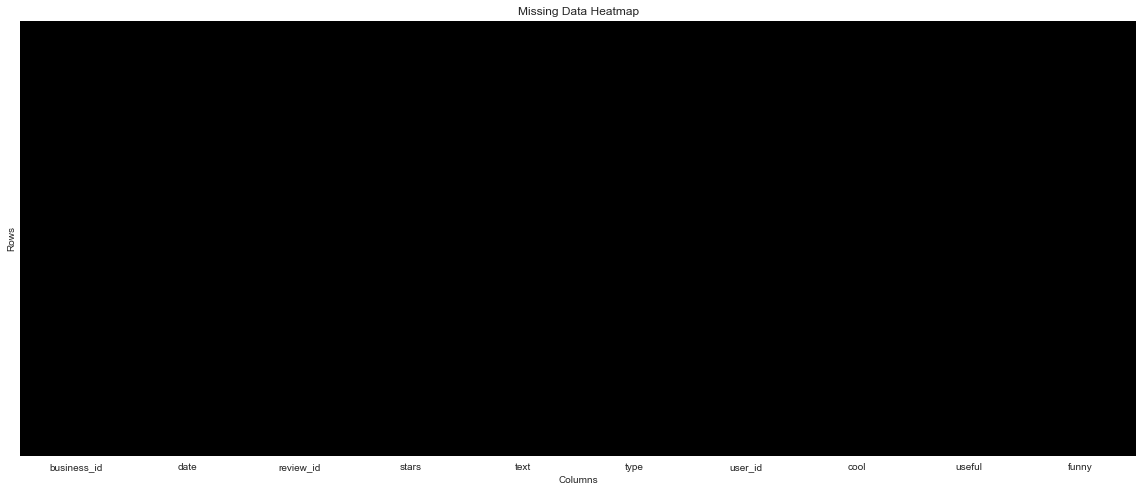

In [276]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')                        #### no missing data found

#### why Amelia, if you coming from R then you might have used Amelia package which detects the missing value 
#### On July 2, 1937, Amelia disappeared over the Pacific Ocean while attempting to become the first female pilot to circumnavigate the world

In [278]:
df.isnull().any()

business_id    False
date           False
review_id      False
stars          False
text           False
type           False
user_id        False
cool           False
useful         False
funny          False
dtype: bool

In [279]:
####################################################################
############## Part IV - Feature Engineering
####################################################################


In [280]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [281]:
df.type.value_counts()

review    10000
Name: type, dtype: int64

In [282]:
df = df[['date','text','stars']]

df.head()                          #### these are the most important cols we will be looking at for this project

,date,text,stars
0,2011-01-26,My wife took me here on my birthday for breakf...,5
1,2011-07-27,I have no idea why some people give bad review...,5
2,2012-06-14,love the gyro plate. Rice is so good and I als...,4
3,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,2012-01-05,General Manager Scott Petello is a good egg!!!...,5


In [283]:
df['dates'] = pd.to_datetime(df.date)

In [284]:
df.head()

,date,text,stars,dates
0,2011-01-26,My wife took me here on my birthday for breakf...,5,2011-01-26
1,2011-07-27,I have no idea why some people give bad review...,5,2011-07-27
2,2012-06-14,love the gyro plate. Rice is so good and I als...,4,2012-06-14
3,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,2010-05-27
4,2012-01-05,General Manager Scott Petello is a good egg!!!...,5,2012-01-05


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10000 non-null  object        
 1   text    10000 non-null  object        
 2   stars   10000 non-null  int64         
 3   dates   10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 312.6+ KB


In [286]:
df = df[['dates','text','stars']]

df.head()

,dates,text,stars
0,2011-01-26,My wife took me here on my birthday for breakf...,5
1,2011-07-27,I have no idea why some people give bad review...,5
2,2012-06-14,love the gyro plate. Rice is so good and I als...,4
3,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,2012-01-05,General Manager Scott Petello is a good egg!!!...,5


In [287]:
df.isnull().any()

dates    False
text     False
stars    False
dtype: bool

In [288]:
df.stars.value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [289]:
df['score'] = df.stars.apply(lambda x: 0 if x in [1,2] else (1 if x == 3 else 2))

In [290]:
df[['stars','score']].head(10)

,stars,score
0,5,2
1,5,2
2,4,2
3,5,2
4,5,2
5,4,2
6,5,2
7,4,2
8,4,2
9,5,2


In [291]:
df.score.value_counts()                       #### this will be very helpful, {0:'poor',1:'OK',2:'good'}

2    6863
0    1676
1    1461
Name: score, dtype: int64

In [292]:
######################################################################
############## Part V - EDA
######################################################################


In [293]:
df.head()

,dates,text,stars,score
0,2011-01-26,My wife took me here on my birthday for breakf...,5,2
1,2011-07-27,I have no idea why some people give bad review...,5,2
2,2012-06-14,love the gyro plate. Rice is so good and I als...,4,2
3,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,2
4,2012-01-05,General Manager Scott Petello is a good egg!!!...,5,2


In [294]:
x = df.dates[0]

x

Timestamp('2011-01-26 00:00:00')

In [295]:
x.day

26

In [296]:
x.dayofweek

2

In [297]:
x.month

1

In [298]:
x.year

2011

In [299]:
df['day'] = df.dates.apply(lambda x: x.day)

In [300]:
df['month'] = df.dates.apply(lambda x:x.month)

In [301]:
df['year'] = df.dates.apply(lambda x:x.year)

In [302]:
df['day_of_week'] = df.dates.apply(lambda x:x.dayofweek)

In [303]:
df['month_name'] = df.month.map({1:'Jan',
                         2:'Feb',
                         3:'Mar',
                         4:'Apr',
                         5:'May',
                         6:'Jun',
                         7:'Jul',
                         8:'Aug',
                         9:'Sep',
                         10:'Oct',
                         11:'Nov',
                         12:'Dec'})


In [304]:
df['day_name'] = df.day_of_week.map({0:'Mon',
                                     1:'Tue',
                                     2:'Wed',
                                     3:'Thr',
                                     4:'Fri',
                                     5:'Sat',
                                     6:'Sun'})


In [305]:
df.head()                           #### this is amazing, we will get a lot of info from this

,dates,text,stars,score,day,month,year,day_of_week,month_name,day_name
0,2011-01-26,My wife took me here on my birthday for breakf...,5,2,26,1,2011,2,Jan,Wed
1,2011-07-27,I have no idea why some people give bad review...,5,2,27,7,2011,2,Jul,Wed
2,2012-06-14,love the gyro plate. Rice is so good and I als...,4,2,14,6,2012,3,Jun,Thr
3,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,2,27,5,2010,3,May,Thr
4,2012-01-05,General Manager Scott Petello is a good egg!!!...,5,2,5,1,2012,3,Jan,Thr


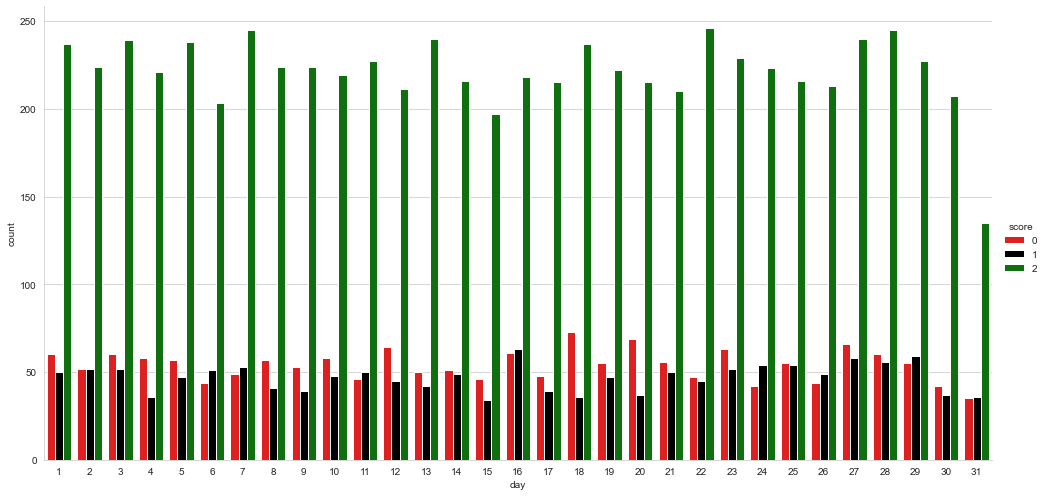

In [306]:
sns.catplot(x='day',data=df,kind='count',hue='score',height=7,aspect=2,palette={0:'red',
                                                                                1:'black',
                                                                                2:'green'})

#### its so close and similar

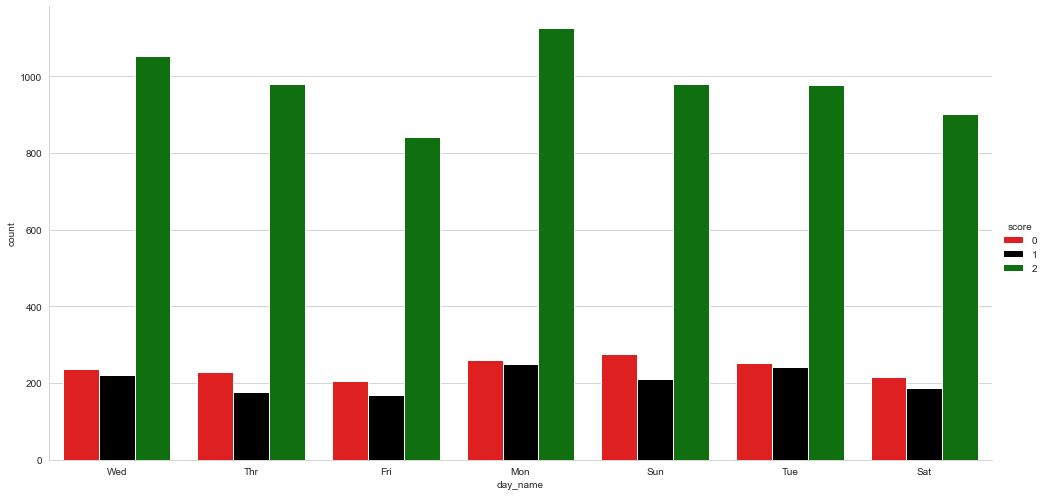

In [307]:
sns.catplot(x='day_name',data=df,kind='count',hue='score',height=7,aspect=2,palette={0:'red',
                                                                                1:'black',
                                                                                2:'green'})

#### its very close and tight but it seems like we get better ratings on Mondays
#### worst ratings are from Sundays but again its very tight

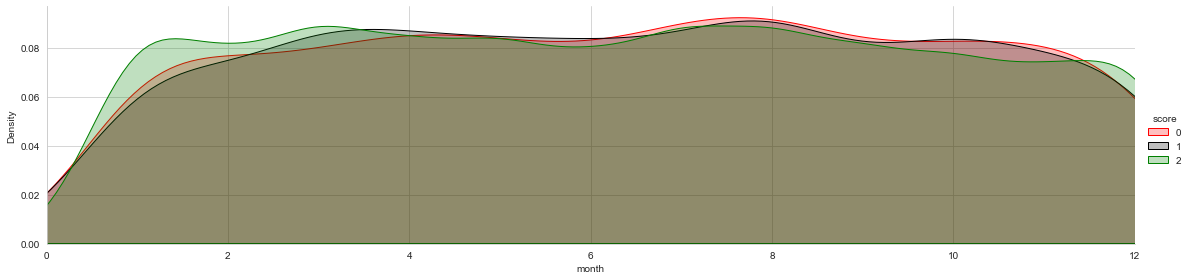

In [308]:
pl = sns.FacetGrid(df,hue='score',aspect=4,height=4,palette={ 0:'red',
                                                                    1:'black',
                                                                    2:'green'})

pl.map(sns.kdeplot,'month',fill=True)

pl.set(xlim=(0,df.month.max()))

pl.add_legend()

#### again nothing to see here, its very close but we see some good ratings in the month of Jan-Mar

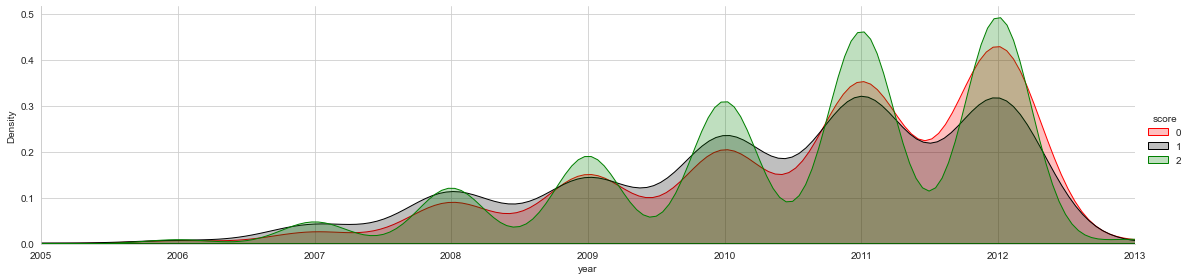

In [309]:
pl = sns.FacetGrid(df,hue='score',aspect=4,height=4,palette={ 0:'red',
                                                                    1:'black',
                                                                    2:'green'})

pl.map(sns.kdeplot,'year',fill=True)

pl.set(xlim=(df.year.min(),df.year.max()))

pl.add_legend()

#### seems like the majority of our data is from 2010-2012 which makes sense due to the advancement of internet

In [310]:
df.month_name.value_counts()

Aug    927
Jan    923
Mar    905
Jul    891
May    848
Apr    841
Oct    814
Dec    812
Sep    784
Jun    780
Feb    739
Nov    736
Name: month_name, dtype: int64

In [311]:
heat = df.groupby(['year','month_name','day_name'])['score'].sum().unstack().unstack().fillna(0)

heat

day_name     Fri                                                        ...  \
month_name   Apr   Aug   Dec   Feb   Jan   Jul   Jun   Mar   May   Nov  ...   
year                                                                    ...   
2005         0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2006         0.0   0.0   2.0   0.0   0.0   0.0   0.0   0.0   2.0   0.0  ...   
2007         1.0   0.0   2.0   4.0   7.0  19.0   1.0   7.0   6.0   9.0  ...   
2008         5.0  21.0   8.0  17.0   4.0   5.0  24.0  11.0   9.0  11.0  ...   
2009        17.0  22.0  16.0  17.0  29.0  25.0  10.0  23.0  22.0  10.0  ...   
2010        21.0  41.0  32.0  28.0  23.0  35.0  26.0  19.0  18.0  13.0  ...   
2011        72.0  41.0  66.0  47.0  49.0  50.0  38.0  54.0  40.0  38.0  ...   
2012        48.0  54.0  23.0  39.0  54.0  22.0  64.0  53.0  45.0  37.0  ...   
2013         0.0   0.0   0.0   0.0  18.0   0.0   0.0   0.0   0.0   0.0  ...   

day_name     Wed                                                        
month_name   Dec   Feb   Jan   Jul   Jun   Mar   May   Nov   Oct   Sep  
year                                                                    
2005         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2006         2.0   0.0   4.0   0.0   0.0   0.0   0.0   4.0   0.0   0.0  
2007         2.0   5.0   2.0   4.0   1.0   5.0   4.0   4.0  13.0   6.0  
2008        11.0  12.0   4.0  18.0  14.0   8.0  11.0  12.0  24.0   7.0  
2009        29.0  20.0  23.0  31.0   9.0  22.0  20.0  16.0  15.0  26.0  
2010        47.0  43.0  29.0  41.0  41.0  58.0  34.0  37.0  32.0  42.0  
2011        59.0  51.0  50.0  51.0  57.0  54.0  50.0  31.0  49.0  63.0  
2012        53.0  65.0  66.0  46.0  66.0  67.0  70.0  44.0  64.0  47.0  
2013         0.0   0.0  28.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[9 rows x 84 columns]

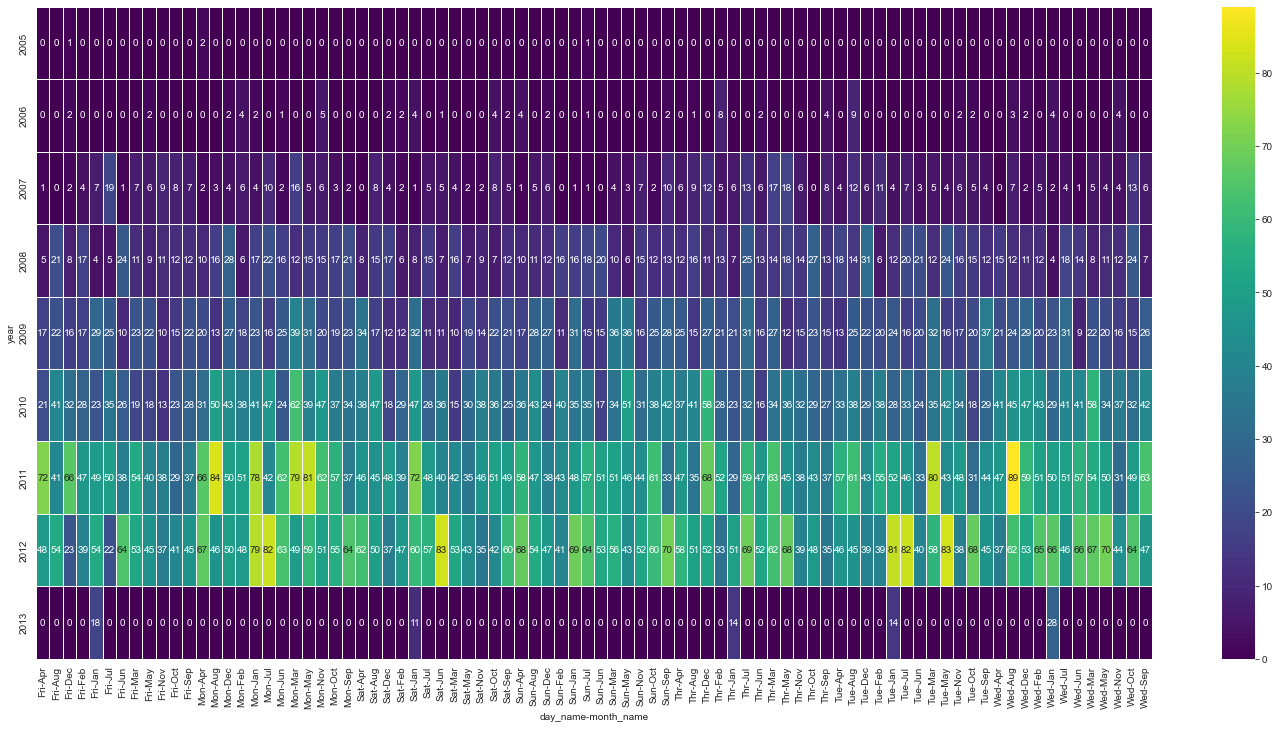

In [312]:
fig, ax = plt.subplots(figsize=(25,12))

sns.heatmap(heat,ax=ax,linewidths=0.5,annot=True,cmap='viridis')


In [313]:
df[df.year == 2013]                 #### the data from this year is more concerning, one reason may be because we dont have much density to this year which skews the outcome

,dates,text,stars,score,day,month,year,day_of_week,month_name,day_name
26,2013-01-03,I love love LOVE this place. My boss (who is i...,5,2,3,1,2013,3,Jan,Thr
254,2013-01-02,Our server Gary was awesome. Food was amazing....,5,2,2,1,2013,2,Jan,Wed
267,2013-01-04,We have been to this location to buy gear prio...,3,1,4,1,2013,4,Jan,Fri
438,2013-01-02,We have tried every Chinese delivery in Chande...,4,2,2,1,2013,2,Jan,Wed
601,2013-01-01,Tried this for the first time today. While my...,2,0,1,1,2013,1,Jan,Tue
627,2013-01-04,We were staying at a local hotel and used onli...,4,2,4,1,2013,4,Jan,Fri
633,2013-01-05,My husband surprised me with a stay-cation at ...,4,2,5,1,2013,5,Jan,Sat
720,2013-01-02,Nice place surrounded by many fast food places...,4,2,2,1,2013,2,Jan,Wed
1073,2013-01-03,I've been to multiple Buca di Beppo locations ...,2,0,3,1,2013,3,Jan,Thr
1575,2013-01-03,Wow this place is fabulous. Everything is so ...,5,2,3,1,2013,3,Jan,Thr


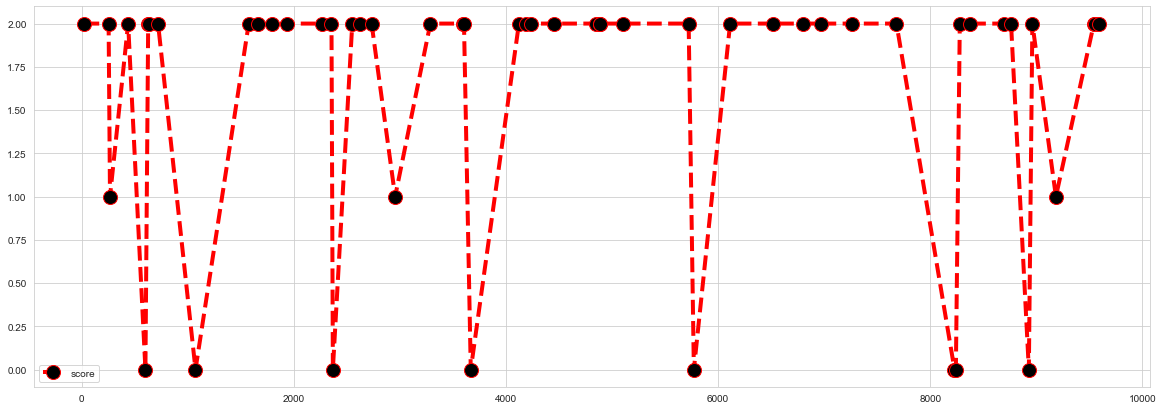

In [314]:
df[df.year == 2013]['score'].plot(legend=True,figsize=(20,7),marker='o',markersize=14,markerfacecolor='black',linestyle='dashed',linewidth=4,color='red')

#### seems like majority is good scores

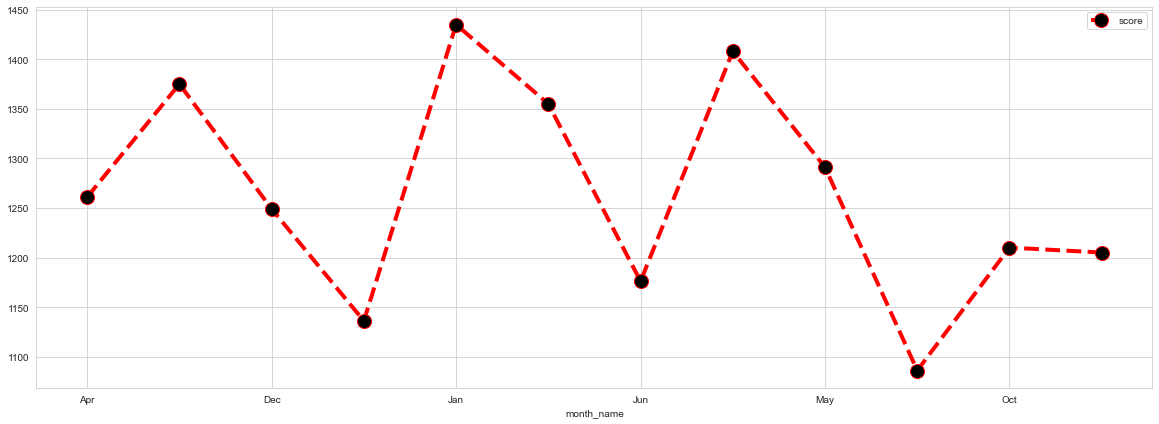

In [315]:
df.groupby('month_name')['score'].sum().plot(legend=True,figsize=(20,7),marker='o',markersize=14,markerfacecolor='black',linestyle='dashed',linewidth=4,color='red')

#### the best month is Jan for reviews

In [316]:
df.groupby('month_name')['score'].sum()               #### worst is November

month_name
Apr    1261
Aug    1375
Dec    1249
Feb    1136
Jan    1435
Jul    1355
Jun    1176
Mar    1408
May    1291
Nov    1086
Oct    1210
Sep    1205
Name: score, dtype: int64

In [317]:
heat = df[df['year'].isin([2008,2009,2010,2011,2012])].groupby(['year','month_name','day'])['score'].sum().unstack().unstack().fillna(0)

heat              #### we only taking years 2008-2012 where the majority of reviews came through

day           1                                                         ...  \
month_name   Apr   Aug   Dec   Feb   Jan   Jul   Jun   Mar   May   Nov  ...   
year                                                                    ...   
2008         2.0   4.0   7.0   9.0   4.0   0.0   2.0   2.0   6.0   4.0  ...   
2009         6.0   2.0   0.0   2.0   0.0   6.0   2.0   4.0   6.0   5.0  ...   
2010        13.0   4.0  10.0  13.0   3.0  13.0   5.0  16.0   7.0   8.0  ...   
2011        17.0  19.0  23.0   8.0  16.0   7.0  16.0  12.0   5.0  10.0  ...   
2012        16.0  13.0   4.0  16.0  14.0  10.0  13.0  10.0  17.0   7.0  ...   

day           31                                                    
month_name   Dec  Feb   Jan   Jul  Jun   Mar   May  Nov   Oct  Sep  
year                                                                
2008         3.0  0.0   2.0   4.0  0.0   2.0   0.0  0.0   6.0  0.0  
2009        13.0  0.0   7.0   4.0  0.0  14.0   4.0  0.0   4.0  0.0  
2010         4.0  0.0  15.0   5.0  0.0   5.0   9.0  0.0  15.0  0.0  
2011         8.0  0.0  24.0  15.0  0.0   9.0   9.0  0.0  10.0  0.0  
2012         9.0  0.0  14.0   5.0  0.0  13.0  17.0  0.0  13.0  0.0  

[5 rows x 372 columns]

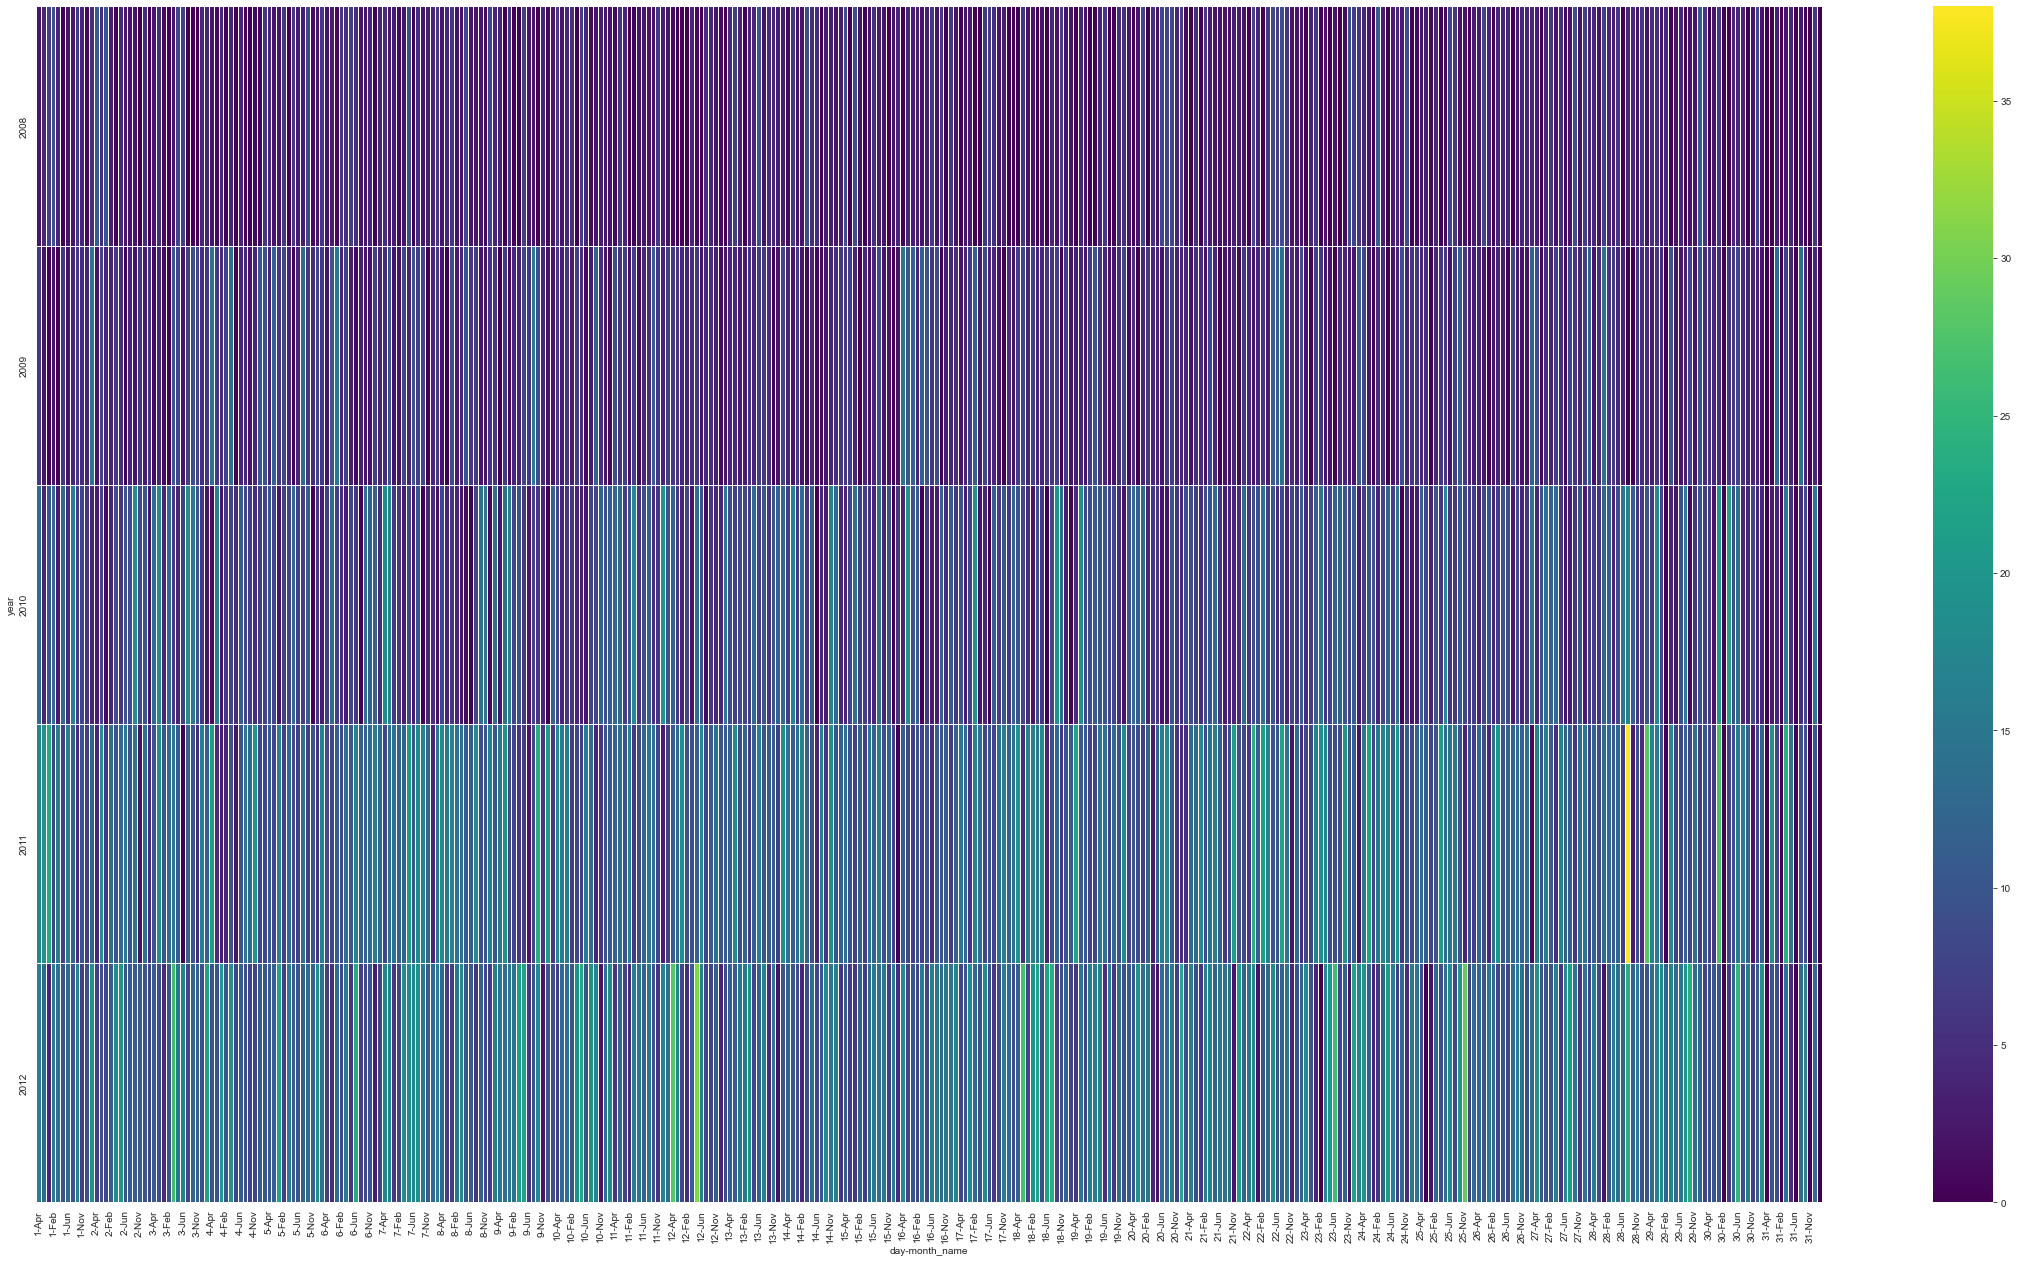

In [318]:
fig, ax = plt.subplots(figsize=(40,22))

sns.heatmap(heat,ax=ax,linewidths=0.5,cmap='viridis')

#### the one that stands out is 2011

In [319]:
heat = df[df['year'].isin([2008,2009,2010,2011,2012])].groupby(['year','month_name'])['score'].sum().unstack().fillna(0)

heat

month_name,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
2008,78,105,118,76,68,123,115,83,90,92,114,90
2009,147,144,160,119,183,145,106,189,156,108,139,172
2010,237,305,251,244,226,251,184,257,250,232,213,227
2011,393,402,372,338,378,353,328,423,340,307,321,300
2012,386,362,301,312,460,422,421,398,411,296,378,366


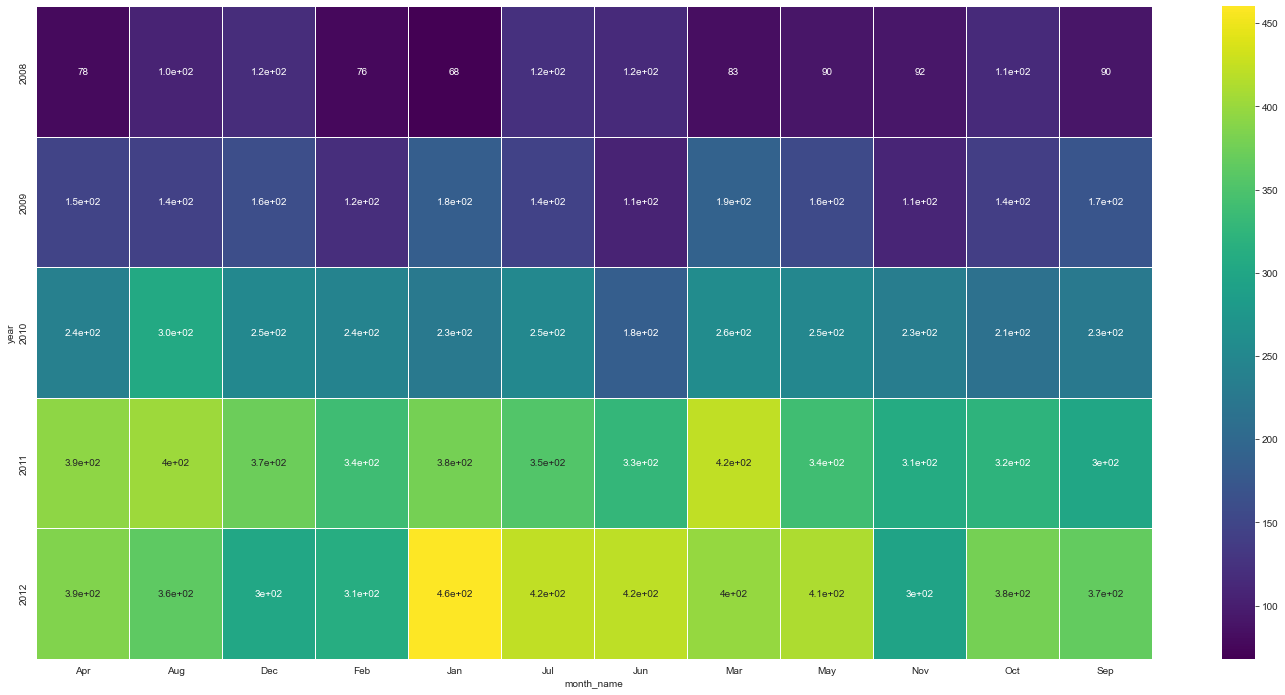

In [320]:
fig, ax = plt.subplots(figsize=(25,12))

sns.heatmap(heat,ax=ax,linewidths=0.5,cmap='viridis',annot=True)

#### here we see that Jan of 2012 which has the most densed reviews

In [321]:
heat[heat == heat.loc[2012].max()].loc[2012].loc['Jan']           #### this the most densed one

460.0

In [322]:
df.head()

,dates,text,stars,score,day,month,year,day_of_week,month_name,day_name
0,2011-01-26,My wife took me here on my birthday for breakf...,5,2,26,1,2011,2,Jan,Wed
1,2011-07-27,I have no idea why some people give bad review...,5,2,27,7,2011,2,Jul,Wed
2,2012-06-14,love the gyro plate. Rice is so good and I als...,4,2,14,6,2012,3,Jun,Thr
3,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,2,27,5,2010,3,May,Thr
4,2012-01-05,General Manager Scott Petello is a good egg!!!...,5,2,5,1,2012,3,Jan,Thr


In [323]:
df['length'] = df.text.apply(len)

In [324]:
df.head()                        #### this gives us more holistic idea

,dates,text,stars,score,day,month,year,day_of_week,month_name,day_name,length
0,2011-01-26,My wife took me here on my birthday for breakf...,5,2,26,1,2011,2,Jan,Wed,889
1,2011-07-27,I have no idea why some people give bad review...,5,2,27,7,2011,2,Jul,Wed,1345
2,2012-06-14,love the gyro plate. Rice is so good and I als...,4,2,14,6,2012,3,Jun,Thr,76
3,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,2,27,5,2010,3,May,Thr,419
4,2012-01-05,General Manager Scott Petello is a good egg!!!...,5,2,5,1,2012,3,Jan,Thr,469


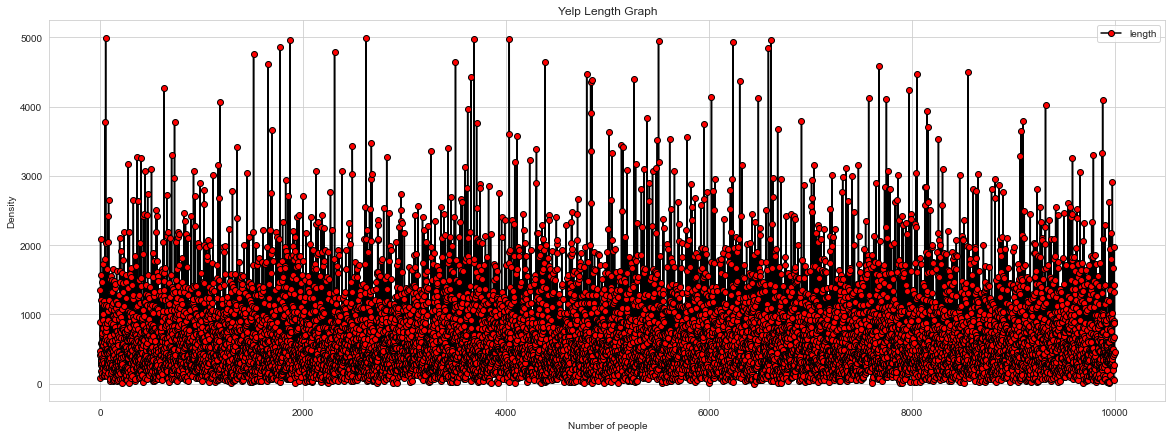

In [325]:
df['length'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('Yelp Length Graph')

plt.xlabel('Number of people')

plt.ylabel('Density')

#### interesting, we do see some outliers

In [326]:
df.length.mean()

710.7387

In [327]:
df.length.max()

4997

In [328]:
df.length.quantile(0.99)            #### this is what we seeing, amazing

3022.01

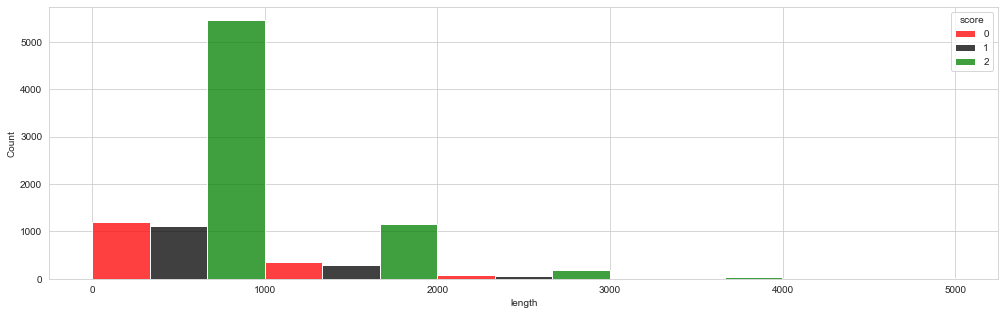

In [329]:
custom = {0:'red',
          1:'black',
          2:'green'}

plt.figure(figsize=(17,5))
sns.histplot(x='length',data=df,hue='score',palette=custom,multiple='dodge',bins=5)

#### seems like people who write lengthy reviews are the ones who leave a better reviews compared to others, I wasn't expecting this honestly

In [330]:
df = df[df.length <= 3000]                        #### we dont want outliers for this


In [331]:
df.head()

,dates,text,stars,score,day,month,year,day_of_week,month_name,day_name,length
0,2011-01-26,My wife took me here on my birthday for breakf...,5,2,26,1,2011,2,Jan,Wed,889
1,2011-07-27,I have no idea why some people give bad review...,5,2,27,7,2011,2,Jul,Wed,1345
2,2012-06-14,love the gyro plate. Rice is so good and I als...,4,2,14,6,2012,3,Jun,Thr,76
3,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,2,27,5,2010,3,May,Thr,419
4,2012-01-05,General Manager Scott Petello is a good egg!!!...,5,2,5,1,2012,3,Jan,Thr,469


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9894 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dates        9894 non-null   datetime64[ns]
 1   text         9894 non-null   object        
 2   stars        9894 non-null   int64         
 3   score        9894 non-null   int64         
 4   day          9894 non-null   int64         
 5   month        9894 non-null   int64         
 6   year         9894 non-null   int64         
 7   day_of_week  9894 non-null   int64         
 8   month_name   9894 non-null   object        
 9   day_name     9894 non-null   object        
 10  length       9894 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 927.6+ KB


In [333]:
heat = df.groupby(['length'])['score'].sum().sort_values(ascending=False).head(20)

heat

length
223    35
320    35
133    33
238    31
253    31
335    30
323    30
355    29
315    29
528    29
202    28
182    28
129    28
303    28
375    27
466    27
329    27
207    26
235    26
195    26
Name: score, dtype: int64

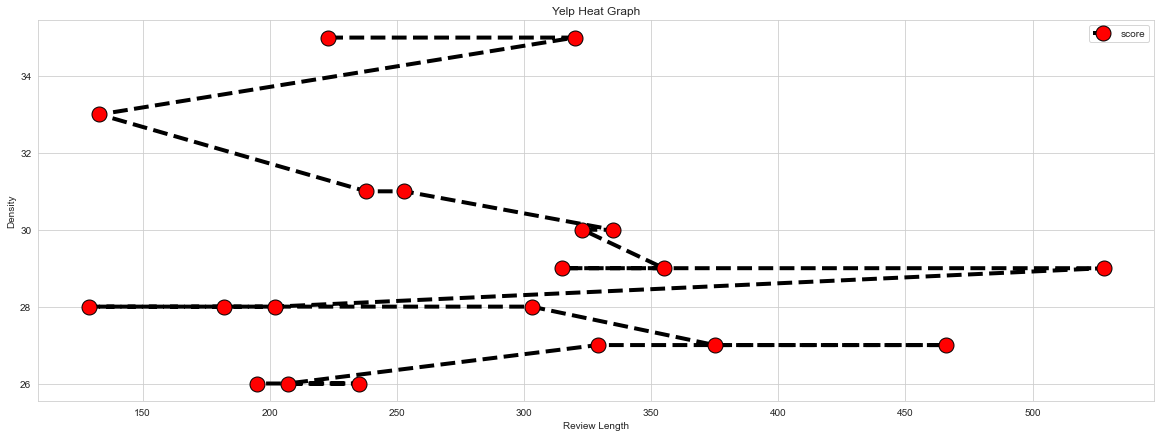

In [334]:
heat.plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black',markersize=15,linestyle='dashed',linewidth=4)

plt.title('Yelp Heat Graph')

plt.xlabel('Review Length')

plt.ylabel('Density')

plt.savefig('Yelp_heat_custom_lineplot.jpeg', dpi=300, bbox_inches='tight')

#### it depicts the length of reviews according to the score values, here we see words 200-250 has the most count

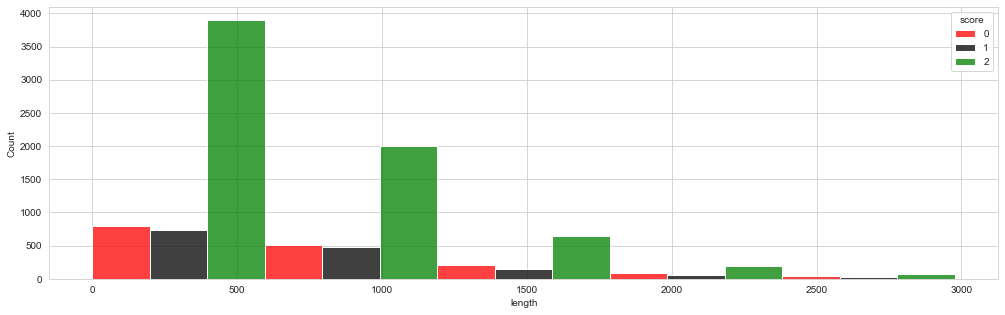

In [335]:
custom = {0:'red',
          1:'black',
          2:'green'}

plt.figure(figsize=(17,5))
sns.histplot(x='length',data=df,hue='score',palette=custom,multiple='dodge',bins=5)

#### we doing the same on the new df and now we see a much better picture 

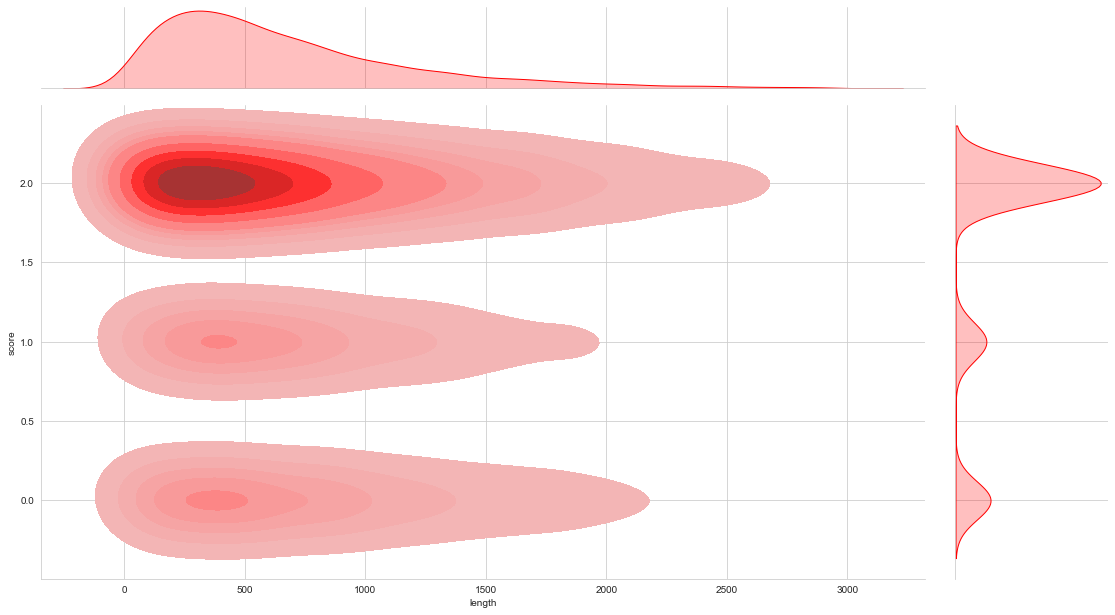

In [336]:
g = sns.jointplot(x='length',y='score',data=df,kind='kde',fill=True,color='red')

g.fig.set_size_inches(17,9)

#### again we see good reviews are heavily densed at around 200 words

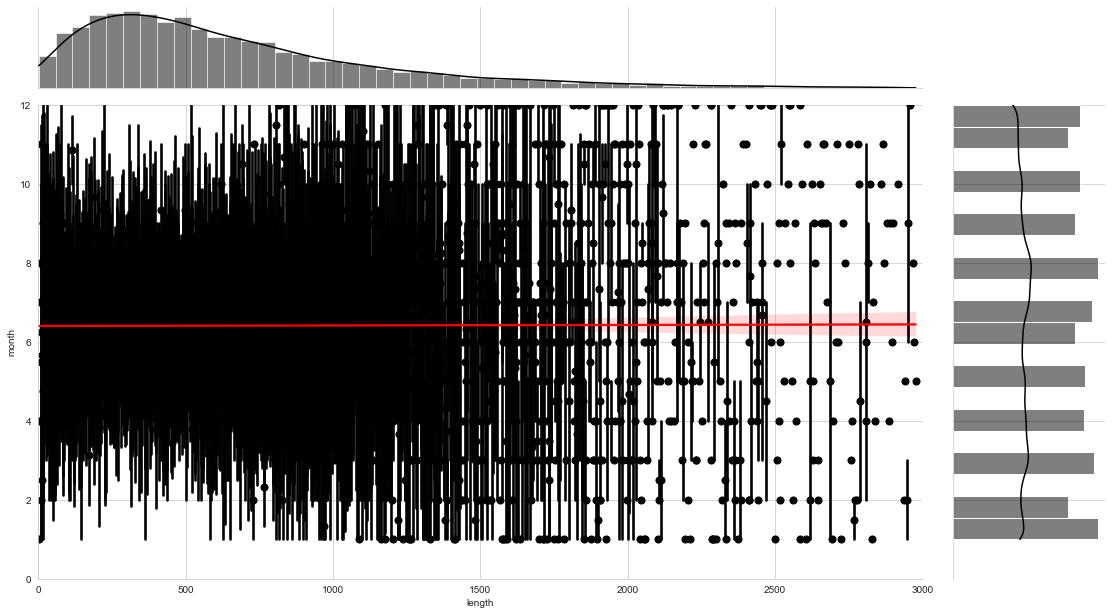

In [337]:
g = sns.jointplot(x='length',y='month',data=df,kind='reg',x_bins=[range(1,3000)],color='black',joint_kws={'line_kws':{'color':'red'}})

g.fig.set_size_inches(17,9)

g.ax_joint.set_xlim(0,3000)
g.ax_joint.set_ylim(0,df.month.max())

#### no correlation

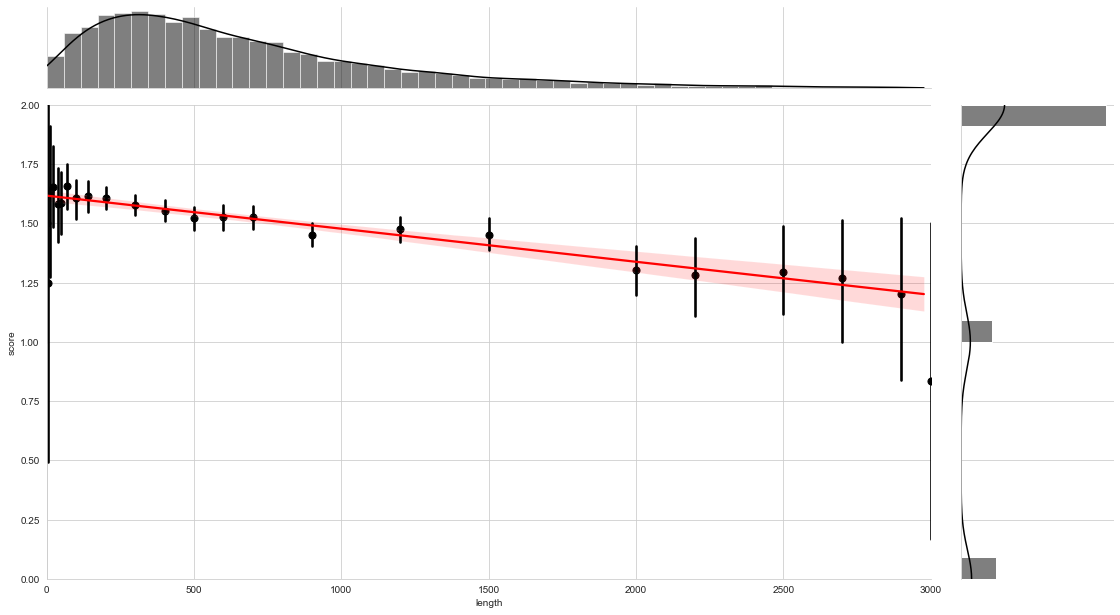

In [338]:
g = sns.jointplot(x='length',y='score',data=df,kind='reg',x_bins=[(1,5,10,20,40,50,70,100,140,200,300,400,500,600,700,900,1200,1500,2000,2200,2500,2700,2900,3000)],color='black',joint_kws={'line_kws':{'color':'red'}})

g.fig.set_size_inches(17,9)

g.ax_joint.set_xlim(0,3000)
g.ax_joint.set_ylim(0,df.score.max())

#### more words are somehow related to poor reviews

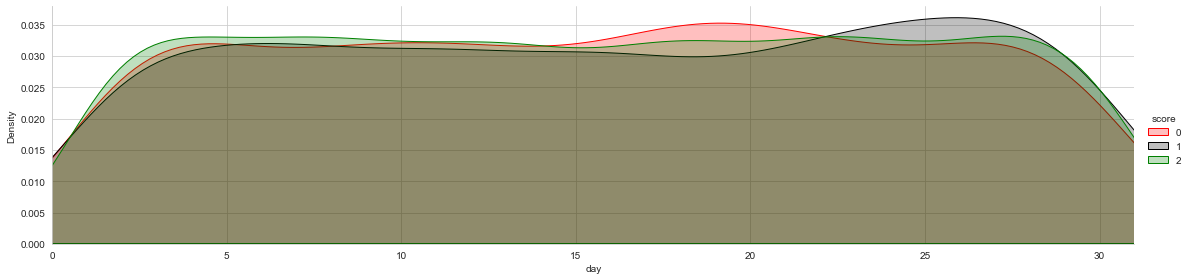

In [339]:
custom = {0:'red',
          1:'black',
          2:'green'}

pl = sns.FacetGrid(df,hue='score',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'day',fill=True)

pl.set(xlim=(0,df.day.max()))

pl.add_legend()

#### seems like 15-20 days we get bad reviews

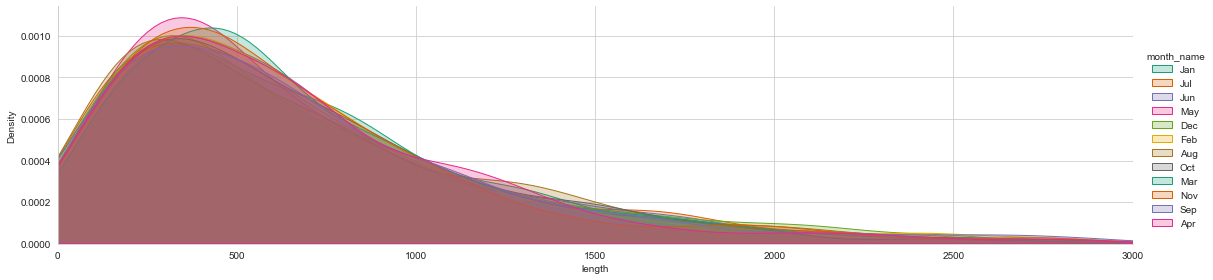

In [340]:
pl = sns.FacetGrid(df,hue='month_name',aspect=4,height=4,palette='Dark2')

pl.map(sns.kdeplot,'length',fill=True)

pl.set(xlim=(0,3000))

pl.add_legend()

#### we dont see much difference honestly

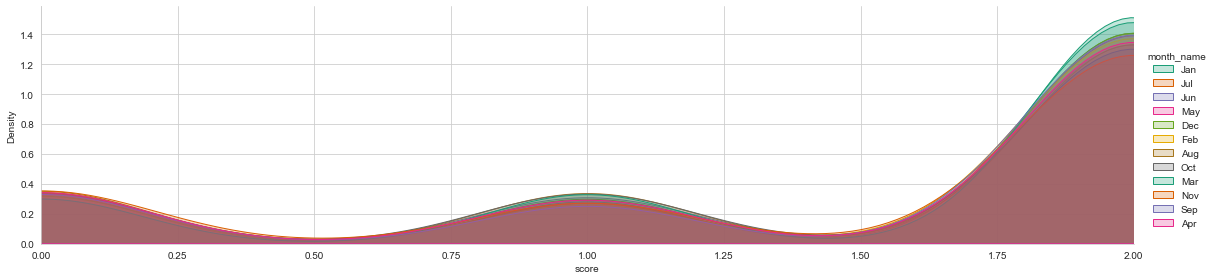

In [341]:
pl = sns.FacetGrid(df,hue='month_name',aspect=4,height=4,palette='Dark2')

pl.map(sns.kdeplot,'score',fill=True)

pl.set(xlim=(0,df.score.max()))

pl.add_legend()

#### Jan being the most reviewed and most of them being positive

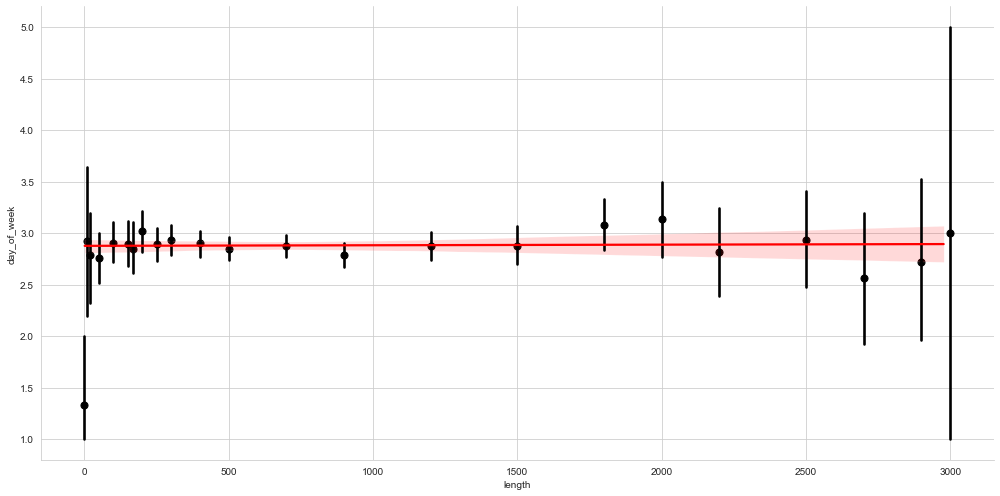

In [342]:
g = sns.lmplot(x='length',y='day_of_week',data=df,x_bins=[(0,10,20,50,100,150,170,200,250,300,400,500,700,900,1200,1500,1800,2000,2200,2500,2700,2900,3000)],height=7,aspect=2,line_kws={'color':'red'},scatter_kws={'color':'black'})

#### not much we see here obviously

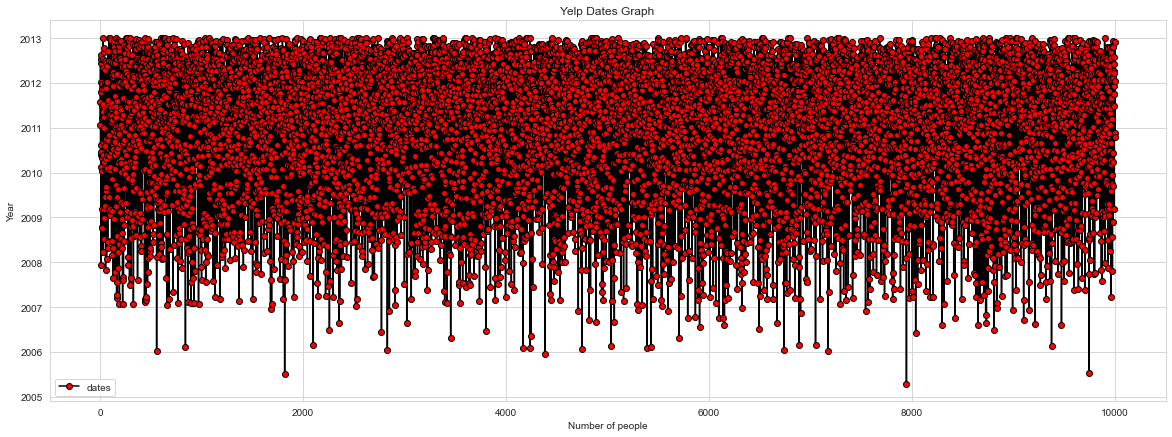

In [343]:
df['dates'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('Yelp Dates Graph')

plt.xlabel('Number of people')

plt.ylabel('Year')

#### we see the majority of reviews are from 2009-2013, we will now be moving to the model phase

In [168]:
######################################################################
############## Part VI - Model - Classification
######################################################################


In [199]:
df.head()

,dates,text,stars,score,day,month,year,day_of_week,month_name,day_name,length
0,2011-01-26,My wife took me here on my birthday for breakf...,5,2,26,1,2011,2,Jan,Wed,889
1,2011-07-27,I have no idea why some people give bad review...,5,2,27,7,2011,2,Jul,Wed,1345
2,2012-06-14,love the gyro plate. Rice is so good and I als...,4,2,14,6,2012,3,Jun,Thr,76
3,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,2,27,5,2010,3,May,Thr,419
4,2012-01-05,General Manager Scott Petello is a good egg!!!...,5,2,5,1,2012,3,Jan,Thr,469


In [200]:
X = df.drop(columns=['dates','text','month_name','day_name','stars','score'])

X.head()

,day,month,year,day_of_week,length
0,26,1,2011,2,889
1,27,7,2011,2,1345
2,14,6,2012,3,76
3,27,5,2010,3,419
4,5,1,2012,3,469


In [201]:
y = df.score

y.head()

0    2
1    2
2    2
3    2
4    2
Name: score, dtype: int64

In [202]:
y.value_counts()                               #### this will be a problem due to low density of data and to top it off its very imbalanced

2    6806
0    1642
1    1446
Name: score, dtype: int64

In [203]:
#### now we will do by taking care of any multicollinearity

from statsmodels.tools.tools import add_constant

X_with_constant = add_constant(X)

X_with_constant.head()                    #### setting up Vif


,const,day,month,year,day_of_week,length
0,1.0,26,1,2011,2,889
1,1.0,27,7,2011,2,1345
2,1.0,14,6,2012,3,76
3,1.0,27,5,2010,3,419
4,1.0,5,1,2012,3,469


In [204]:
vif = pd.DataFrame()

In [205]:
vif["Feature"] = X_with_constant.columns


In [206]:
X_with_constant.isnull().any()

const          False
day            False
month          False
year           False
day_of_week    False
length         False
dtype: bool

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]


In [208]:
vif                          #### seems good

,Feature,VIF
0,const,2.034281e+06
1,day,1.000815e+00
2,month,1.004700e+00
3,year,1.023381e+00
4,day_of_week,1.000469e+00
5,length,1.018162e+00


In [209]:
X.head()

,day,month,year,day_of_week,length
0,26,1,2011,2,889
1,27,7,2011,2,1345
2,14,6,2012,3,76
3,27,5,2010,3,419
4,5,1,2012,3,469


In [210]:
X = df.text

X.head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
2    love the gyro plate. Rice is so good and I als...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
Name: text, dtype: object

In [211]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: score, dtype: int64

In [213]:
X.isnull().any()

False

In [214]:
y.isnull().any()

False

In [232]:
from sklearn.model_selection import train_test_split


In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [234]:
from sklearn.pipeline import Pipeline


In [235]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


In [236]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])


In [237]:
model.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', MultinomialNB())])

In [238]:
y_predict = model.predict(X_test)


In [239]:
from sklearn import metrics


In [240]:
print(metrics.classification_report(y_test,y_predict))                #### not good

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       491
           1       0.00      0.00      0.00       431
           2       0.69      1.00      0.82      2047

    accuracy                           0.69      2969
   macro avg       0.56      0.33      0.27      2969
weighted avg       0.64      0.69      0.56      2969



C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [241]:
from sklearn.ensemble import RandomForestClassifier


In [242]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', RandomForestClassifier(random_state=42,n_jobs=-1,class_weight='balanced'))
])


In [243]:
model.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        random_state=42))])

In [244]:
y_predict = model.predict(X_test)


In [245]:
print(metrics.classification_report(y_test,y_predict))                       #### still not good on imbalanced targets

              precision    recall  f1-score   support

           0       0.91      0.19      0.31       491
           1       0.19      0.01      0.01       431
           2       0.71      1.00      0.83      2047

    accuracy                           0.72      2969
   macro avg       0.60      0.40      0.39      2969
weighted avg       0.67      0.72      0.63      2969



In [246]:
from imblearn.over_sampling import SMOTE


In [247]:
from imblearn.pipeline import Pipeline as ImbPipeline


In [248]:
model = ImbPipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1))
])


In [249]:
model.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('smote', SMOTE(random_state=42)),
                ('clf', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [250]:
y_predict = model.predict(X_test)


In [251]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.63      0.42      0.50       491
           1       0.32      0.12      0.17       431
           2       0.77      0.93      0.84      2047

    accuracy                           0.73      2969
   macro avg       0.57      0.49      0.50      2969
weighted avg       0.68      0.73      0.69      2969



In [252]:
model = ImbPipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1,class_weight='balanced'))
])


In [253]:
%%time

model.fit(X_train, y_train)


Wall time: 14.7 s


Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        random_state=42))])

In [254]:
y_predict = model.predict(X_test)


In [255]:
print(metrics.classification_report(y_test,y_predict))                 #### some improvements

              precision    recall  f1-score   support

           0       0.63      0.42      0.50       491
           1       0.32      0.12      0.17       431
           2       0.77      0.93      0.84      2047

    accuracy                           0.73      2969
   macro avg       0.57      0.49      0.50      2969
weighted avg       0.68      0.73      0.69      2969



In [256]:
from lightgbm import LGBMClassifier


C:\Users\USER\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [258]:
model = ImbPipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('smote', SMOTE(random_state=42)),
    ('clf', LGBMClassifier(class_weight='balanced', random_state=42,n_jobs=-1))

])


In [259]:
%%time

model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.264685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 247033
[LightGBM] [Info] Number of data points in the train set: 14277, number of used features: 5430
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Wall time: 37.4 s


Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 LGBMClassifier(class_weight='balanced', n_jobs=-1,
                                random_state=42))])

In [260]:
y_predict = model.predict(X_test)


In [261]:
print(metrics.classification_report(y_test,y_predict))                      #### much better

              precision    recall  f1-score   support

           0       0.67      0.60      0.63       491
           1       0.38      0.29      0.33       431
           2       0.83      0.89      0.86      2047

    accuracy                           0.76      2969
   macro avg       0.63      0.59      0.61      2969
weighted avg       0.74      0.76      0.75      2969



In [262]:
from catboost import CatBoostClassifier


In [263]:
model = ImbPipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('smote', SMOTE(random_state=42)),
    ('clf', CatBoostClassifier(auto_class_weights='Balanced', random_state=42))
])


In [264]:
%%time

model.fit(X_train, y_train)


Learning rate set to 0.090617
0:	learn: 1.0739121	total: 2.55s	remaining: 42m 28s
1:	learn: 1.0547630	total: 4.2s	remaining: 34m 55s
2:	learn: 1.0369044	total: 6.02s	remaining: 33m 20s
3:	learn: 1.0192630	total: 7.69s	remaining: 31m 53s
4:	learn: 1.0053045	total: 9.31s	remaining: 30m 53s
5:	learn: 0.9928185	total: 11.3s	remaining: 31m 11s
6:	learn: 0.9809533	total: 13s	remaining: 30m 39s
7:	learn: 0.9691058	total: 14.7s	remaining: 30m 25s
8:	learn: 0.9560136	total: 16.4s	remaining: 30m 4s
9:	learn: 0.9438572	total: 18.1s	remaining: 29m 51s
10:	learn: 0.9336934	total: 20s	remaining: 29m 57s
11:	learn: 0.9244685	total: 21.8s	remaining: 29m 55s
12:	learn: 0.9145394	total: 23.4s	remaining: 29m 38s
13:	learn: 0.9065032	total: 25.1s	remaining: 29m 28s
14:	learn: 0.8984330	total: 27s	remaining: 29m 31s
15:	learn: 0.8905109	total: 28.8s	remaining: 29m 33s
16:	learn: 0.8831228	total: 30.5s	remaining: 29m 21s
17:	learn: 0.8751718	total: 32s	remaining: 29m 4s
18:	learn: 0.8689306	total: 33.5s	rem

153:	learn: 0.5623812	total: 4m 19s	remaining: 23m 47s
154:	learn: 0.5612608	total: 4m 21s	remaining: 23m 44s
155:	learn: 0.5604307	total: 4m 22s	remaining: 23m 41s
156:	learn: 0.5597682	total: 4m 24s	remaining: 23m 39s
157:	learn: 0.5582190	total: 4m 25s	remaining: 23m 37s
158:	learn: 0.5571752	total: 4m 27s	remaining: 23m 35s
159:	learn: 0.5559340	total: 4m 29s	remaining: 23m 32s
160:	learn: 0.5549493	total: 4m 30s	remaining: 23m 30s
161:	learn: 0.5536507	total: 4m 32s	remaining: 23m 29s
162:	learn: 0.5528199	total: 4m 34s	remaining: 23m 27s
163:	learn: 0.5518854	total: 4m 35s	remaining: 23m 25s
164:	learn: 0.5508503	total: 4m 37s	remaining: 23m 23s
165:	learn: 0.5496506	total: 4m 38s	remaining: 23m 21s
166:	learn: 0.5486315	total: 4m 40s	remaining: 23m 19s
167:	learn: 0.5474314	total: 4m 42s	remaining: 23m 16s
168:	learn: 0.5461856	total: 4m 43s	remaining: 23m 14s
169:	learn: 0.5453465	total: 4m 45s	remaining: 23m 12s
170:	learn: 0.5444773	total: 4m 46s	remaining: 23m 9s
171:	learn:

304:	learn: 0.4570573	total: 8m 16s	remaining: 18m 50s
305:	learn: 0.4564661	total: 8m 17s	remaining: 18m 48s
306:	learn: 0.4558836	total: 8m 19s	remaining: 18m 47s
307:	learn: 0.4553620	total: 8m 20s	remaining: 18m 45s
308:	learn: 0.4546069	total: 8m 22s	remaining: 18m 43s
309:	learn: 0.4540628	total: 8m 23s	remaining: 18m 41s
310:	learn: 0.4536465	total: 8m 25s	remaining: 18m 39s
311:	learn: 0.4532230	total: 8m 26s	remaining: 18m 37s
312:	learn: 0.4527975	total: 8m 28s	remaining: 18m 36s
313:	learn: 0.4524767	total: 8m 29s	remaining: 18m 34s
314:	learn: 0.4522343	total: 8m 31s	remaining: 18m 32s
315:	learn: 0.4519721	total: 8m 33s	remaining: 18m 30s
316:	learn: 0.4517039	total: 8m 34s	remaining: 18m 28s
317:	learn: 0.4512524	total: 8m 36s	remaining: 18m 26s
318:	learn: 0.4509731	total: 8m 37s	remaining: 18m 24s
319:	learn: 0.4505875	total: 8m 39s	remaining: 18m 23s
320:	learn: 0.4499524	total: 8m 40s	remaining: 18m 21s
321:	learn: 0.4494629	total: 8m 42s	remaining: 18m 19s
322:	learn

453:	learn: 0.4049647	total: 12m 11s	remaining: 14m 39s
454:	learn: 0.4048133	total: 12m 13s	remaining: 14m 38s
455:	learn: 0.4045833	total: 12m 14s	remaining: 14m 36s
456:	learn: 0.4042781	total: 12m 15s	remaining: 14m 34s
457:	learn: 0.4041467	total: 12m 17s	remaining: 14m 32s
458:	learn: 0.4039977	total: 12m 19s	remaining: 14m 31s
459:	learn: 0.4038217	total: 12m 20s	remaining: 14m 29s
460:	learn: 0.4036106	total: 12m 22s	remaining: 14m 27s
461:	learn: 0.4035039	total: 12m 23s	remaining: 14m 25s
462:	learn: 0.4031397	total: 12m 25s	remaining: 14m 24s
463:	learn: 0.4029667	total: 12m 26s	remaining: 14m 22s
464:	learn: 0.4027906	total: 12m 28s	remaining: 14m 20s
465:	learn: 0.4025417	total: 12m 29s	remaining: 14m 19s
466:	learn: 0.4023306	total: 12m 31s	remaining: 14m 17s
467:	learn: 0.4022473	total: 12m 32s	remaining: 14m 15s
468:	learn: 0.4020307	total: 12m 34s	remaining: 14m 13s
469:	learn: 0.4016960	total: 12m 35s	remaining: 14m 12s
470:	learn: 0.4014947	total: 12m 37s	remaining: 

601:	learn: 0.3733408	total: 15m 59s	remaining: 10m 34s
602:	learn: 0.3730886	total: 16m	remaining: 10m 32s
603:	learn: 0.3728171	total: 16m 2s	remaining: 10m 30s
604:	learn: 0.3725895	total: 16m 3s	remaining: 10m 29s
605:	learn: 0.3724026	total: 16m 5s	remaining: 10m 27s
606:	learn: 0.3723138	total: 16m 6s	remaining: 10m 25s
607:	learn: 0.3721902	total: 16m 8s	remaining: 10m 24s
608:	learn: 0.3718495	total: 16m 9s	remaining: 10m 22s
609:	learn: 0.3717683	total: 16m 11s	remaining: 10m 20s
610:	learn: 0.3716590	total: 16m 12s	remaining: 10m 19s
611:	learn: 0.3712827	total: 16m 14s	remaining: 10m 17s
612:	learn: 0.3711209	total: 16m 15s	remaining: 10m 16s
613:	learn: 0.3707448	total: 16m 17s	remaining: 10m 14s
614:	learn: 0.3705148	total: 16m 18s	remaining: 10m 12s
615:	learn: 0.3703655	total: 16m 20s	remaining: 10m 11s
616:	learn: 0.3702806	total: 16m 21s	remaining: 10m 9s
617:	learn: 0.3701686	total: 16m 23s	remaining: 10m 7s
618:	learn: 0.3700798	total: 16m 24s	remaining: 10m 6s
619:	

751:	learn: 0.3482227	total: 19m 48s	remaining: 6m 32s
752:	learn: 0.3480842	total: 19m 50s	remaining: 6m 30s
753:	learn: 0.3480090	total: 19m 51s	remaining: 6m 28s
754:	learn: 0.3479351	total: 19m 53s	remaining: 6m 27s
755:	learn: 0.3478935	total: 19m 54s	remaining: 6m 25s
756:	learn: 0.3478325	total: 19m 56s	remaining: 6m 24s
757:	learn: 0.3477456	total: 19m 57s	remaining: 6m 22s
758:	learn: 0.3476699	total: 19m 59s	remaining: 6m 20s
759:	learn: 0.3475724	total: 20m	remaining: 6m 19s
760:	learn: 0.3474928	total: 20m 2s	remaining: 6m 17s
761:	learn: 0.3473189	total: 20m 3s	remaining: 6m 16s
762:	learn: 0.3472299	total: 20m 5s	remaining: 6m 14s
763:	learn: 0.3471732	total: 20m 6s	remaining: 6m 12s
764:	learn: 0.3471255	total: 20m 8s	remaining: 6m 11s
765:	learn: 0.3470645	total: 20m 10s	remaining: 6m 9s
766:	learn: 0.3467592	total: 20m 11s	remaining: 6m 8s
767:	learn: 0.3467132	total: 20m 13s	remaining: 6m 6s
768:	learn: 0.3463876	total: 20m 14s	remaining: 6m 4s
769:	learn: 0.3461434	t

902:	learn: 0.3298873	total: 23m 39s	remaining: 2m 32s
903:	learn: 0.3295290	total: 23m 41s	remaining: 2m 30s
904:	learn: 0.3294891	total: 23m 43s	remaining: 2m 29s
905:	learn: 0.3294391	total: 23m 44s	remaining: 2m 27s
906:	learn: 0.3293910	total: 23m 46s	remaining: 2m 26s
907:	learn: 0.3293046	total: 23m 47s	remaining: 2m 24s
908:	learn: 0.3292022	total: 23m 49s	remaining: 2m 23s
909:	learn: 0.3291503	total: 23m 50s	remaining: 2m 21s
910:	learn: 0.3291045	total: 23m 52s	remaining: 2m 19s
911:	learn: 0.3289883	total: 23m 53s	remaining: 2m 18s
912:	learn: 0.3289312	total: 23m 55s	remaining: 2m 16s
913:	learn: 0.3287497	total: 23m 56s	remaining: 2m 15s
914:	learn: 0.3286532	total: 23m 58s	remaining: 2m 13s
915:	learn: 0.3285954	total: 23m 59s	remaining: 2m 12s
916:	learn: 0.3285094	total: 24m 1s	remaining: 2m 10s
917:	learn: 0.3283245	total: 24m 2s	remaining: 2m 8s
918:	learn: 0.3281990	total: 24m 4s	remaining: 2m 7s
919:	learn: 0.3281389	total: 24m 5s	remaining: 2m 5s
920:	learn: 0.328

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 <catboost.core.CatBoostClassifier object at 0x000001D30D2A86D8>)])

In [265]:
y_predict = model.predict(X_test)


In [266]:
print(metrics.classification_report(y_test,y_predict))                   #### not much improvements

              precision    recall  f1-score   support

           0       0.66      0.57      0.61       491
           1       0.37      0.32      0.34       431
           2       0.83      0.88      0.86      2047

    accuracy                           0.75      2969
   macro avg       0.62      0.59      0.60      2969
weighted avg       0.74      0.75      0.74      2969



In [ ]:
############################################################################################################################
#### We will be concluding our modeling phase at this point due to the limited improvement in model performance. ###########
#### Despite applying various techniques to address class imbalance using ImbPipeline with SMOTE, the results have #########
#### not significantly improved. Our efforts included extensive preprocessing, feature engineering, and the use of #########
#### advanced models such as LightGBM and CatBoost, which yielded the best results. However, further enhancements in #######
#### metrics and performance have plateaued. ###############################################################################
############################################################################################################################
